In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [67]:
train = pd.read_csv('train.csv')

In [68]:
test = pd.read_csv('test.csv')

In [69]:
for dataset in [train, test]:
    bins = [-1,1,4,7,9]
    names = ['ruim','média','boa','ótima']
    dataset['jogada'] = pd.cut(dataset.poker_hand, bins, labels=names)
    dataset['jogada'] = dataset.jogada.astype('object')

In [70]:
train.head()

,N1,V1,N2,V2,N3,V3,N4,V4,N5,V5,poker_hand,jogada
0,1,10,1,11,1,13,1,12,1,1,9,ótima
1,2,11,2,13,2,10,2,12,2,1,9,ótima
2,3,12,3,11,3,13,3,10,3,1,9,ótima
3,4,10,4,11,4,1,4,13,4,12,9,ótima
4,4,1,4,13,4,12,4,11,4,10,9,ótima


In [71]:
import matplotlib.pyplot as plt

In [72]:
import seaborn as sns

In [73]:
sns.set() 

In [74]:
%matplotlib inline

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
N1            1000000 non-null int64
V1            1000000 non-null int64
N2            1000000 non-null int64
V2            1000000 non-null int64
N3            1000000 non-null int64
V3            1000000 non-null int64
N4            1000000 non-null int64
V4            1000000 non-null int64
N5            1000000 non-null int64
V5            1000000 non-null int64
poker_hand    1000000 non-null int64
jogada        1000000 non-null object
dtypes: int64(11), object(1)
memory usage: 91.6+ MB


In [76]:
train = train.drop(['poker_hand'], axis=1)

In [77]:
train.head()

,N1,V1,N2,V2,N3,V3,N4,V4,N5,V5,jogada
0,1,10,1,11,1,13,1,12,1,1,ótima
1,2,11,2,13,2,10,2,12,2,1,ótima
2,3,12,3,11,3,13,3,10,3,1,ótima
3,4,10,4,11,4,1,4,13,4,12,ótima
4,4,1,4,13,4,12,4,11,4,10,ótima


In [78]:
test = test.drop(['poker_hand'], axis=1)

In [8]:
test.head()

,N1,V1,N2,V2,N3,V3,N4,V4,N5,V5,jogada
0,1,1,1,13,2,4,2,3,1,12,ruim
1,3,12,3,2,3,11,4,5,2,5,ruim
2,1,9,4,6,1,4,3,2,3,9,ruim
3,1,4,3,13,2,13,2,1,3,6,ruim
4,3,10,2,7,1,2,2,11,4,9,ruim


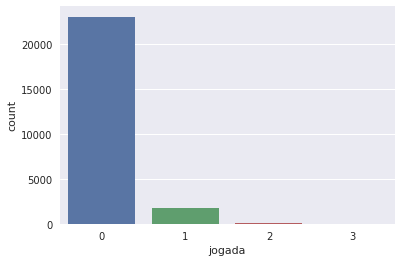

In [110]:
sns.countplot(x='jogada', data=train)

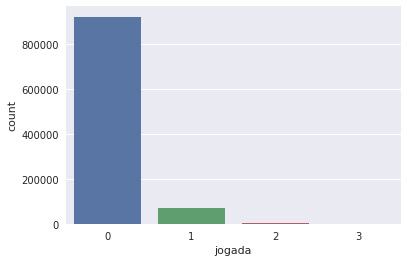

In [111]:
sns.countplot(x='jogada', data=test)

In [79]:
jogadas = {'ruim': 0, 'média': 1, 'boa': 2, 'ótima': 3}

In [80]:
for dataset in [train, test]:
    dataset['jogada'] = dataset['jogada'].map(jogadas).astype(int)

In [81]:
train.head()

,N1,V1,N2,V2,N3,V3,N4,V4,N5,V5,jogada
0,1,10,1,11,1,13,1,12,1,1,3
1,2,11,2,13,2,10,2,12,2,1,3
2,3,12,3,11,3,13,3,10,3,1,3
3,4,10,4,11,4,1,4,13,4,12,3
4,4,1,4,13,4,12,4,11,4,10,3


In [82]:
x_df = train[['N1', 'V1', 'N2', 'V2', 'N3', 'V3', 'N4', 'V4', 'N5', 'V5']]

In [83]:
y_df = train['jogada']

In [84]:
Xdummies_df = pd.get_dummies(x_df)

In [85]:
X = Xdummies_df.values
Y = y_df.values

In [86]:
treino_dados = X
treino_marcacoes = Y

In [87]:
x_df = test[['N1', 'V1', 'N2', 'V2', 'N3', 'V3', 'N4', 'V4', 'N5', 'V5']]

In [88]:
y_df = test['jogada']

In [89]:
Xdummies_df = pd.get_dummies(x_df)

In [90]:
X = Xdummies_df.values
Y = y_df.values

In [91]:
teste_dados = X
teste_marcacoes = Y

In [92]:
def analyze(dataset, columns, model):
    data = dataset.iloc[:, 0:columns].values
    answers = dataset.iloc[:, columns].values

    from sklearn.model_selection import train_test_split
    training_data, predict_data, training_answers, predict_answers = train_test_split(data, answers, test_size=0.25, random_state=0)

    model.fit(training_data, training_answers)
    return "%s: %.2f%%" % (model.__class__.__name__, model.score(predict_data, predict_answers) * 100)

In [101]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import numpy as np

In [102]:
def plot_corr(df,size=7):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()

              N1        V1        N2        V2        N3        V3        N4  \
N1      1.000000 -0.001450 -0.021647  0.001212 -0.019335  0.000414 -0.019263   
V1     -0.001450  1.000000 -0.000679 -0.021512 -0.000133 -0.019390 -0.000118   
N2     -0.021647 -0.000679  1.000000  0.000061 -0.019172  0.000963 -0.020511   
V2      0.001212 -0.021512  0.000061  1.000000 -0.000438 -0.020856  0.001535   
N3     -0.019335 -0.000133 -0.019172 -0.000438  1.000000  0.001093 -0.019825   
V3      0.000414 -0.019390  0.000963 -0.020856  0.001093  1.000000 -0.000176   
N4     -0.019263 -0.000118 -0.020511  0.001535 -0.019825 -0.000176  1.000000   
V4     -0.000059 -0.018657 -0.000118 -0.020684  0.000623 -0.019029 -0.000339   
N5     -0.018926  0.000212 -0.020205 -0.000639 -0.020612  0.001361 -0.019475   
V5      0.001545 -0.021046  0.001309 -0.017275  0.000017 -0.020381 -0.000368   
jogada  0.000447  0.001887  0.000701  0.000919  0.000722  0.001434 -0.000783   

              V4        N5        V5   

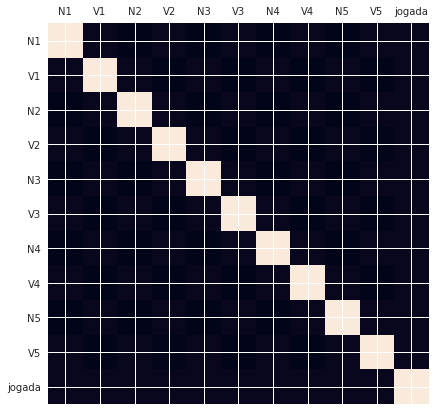

In [103]:
plot_corr(test, size=7)

In [110]:
def measure_metric(modelo,  X_treino, X_teste, Y_treino, Y_teste):
    result = modelo.fit(X_treino, Y_treino).predict(X_teste)
    print(modelo.__class__.__name__)
    print('Accuracy: %.2f%%' % (accuracy_score(result, Y_teste) * 100))
    print('Precisão: %.2f%%' % (precision_score(result, teste_marcacoes, average='weighted') * 100))
    print('Recall: %.2f%%' % (recall_score(result, teste_marcacoes, average='weighted', labels=np.unique(result)) * 100))
    print('F-measure: %.2f%%' % (f1_score(result, teste_marcacoes, average='weighted', labels=np.unique(result)) * 100))
    print('Kappa: %s' % (cohen_kappa_score(result, teste_marcacoes)))

In [111]:
measure_metric(MultinomialNB(), treino_dados, teste_dados, treino_marcacoes, teste_marcacoes)

MultinomialNB
Accuracy: 92.37%
Precisão: 100.00%
Recall: 92.37%
F-measure: 96.03%
Kappa: 0.0


In [112]:
measure_metric(AdaBoostClassifier(), treino_dados, teste_dados, treino_marcacoes, teste_marcacoes)

AdaBoostClassifier
Accuracy: 92.34%
Precisão: 99.94%
Recall: 92.34%
F-measure: 95.99%
Kappa: 4.67620620812e-05


In [114]:
measure_metric(OneVsOneClassifier(LinearSVC(random_state=0)), treino_dados, teste_dados, treino_marcacoes, teste_marcacoes)

OneVsOneClassifier
Accuracy: 92.37%
Precisão: 100.00%
Recall: 92.37%
F-measure: 96.03%
Kappa: 0.0


In [115]:
measure_metric(OneVsRestClassifier(LinearSVC(random_state=0)), treino_dados, teste_dados, treino_marcacoes, teste_marcacoes)

OneVsRestClassifier
Accuracy: 92.37%
Precisão: 100.00%
Recall: 92.37%
F-measure: 96.03%
Kappa: 0.0


In [116]:
measure_metric(RandomForestClassifier(), treino_dados, teste_dados, treino_marcacoes, teste_marcacoes)

RandomForestClassifier
Accuracy: 92.35%
Precisão: 99.39%
Recall: 92.35%
F-measure: 95.65%
Kappa: 0.0402249485425
